In [33]:
import subprocess
import matplotlib.pyplot as plt
import numpy as np
times = 5

## Single-threaded Implementation

In [18]:
avgSingle = []
for c in range(10, 18):
    temp = 0.0
    for _ in range(times):
        p = subprocess.Popen("./cha -d -i 1GB.bin -c {}".format(2**c), stdout=subprocess.PIPE, shell=True)
        (output, err) = p.communicate()
        p_status = p.wait()
        elapsed = float(str(output.decode()))
        temp += elapsed
    temp /= times
    avgSingle.append(temp)
avgSingleWrites = []
for c in range(10, 18):
    temp = 0.0
    for _ in range(times):
        p = subprocess.Popen("./cha -d -i 1GB.bin -o out.bin", stdout=subprocess.PIPE, shell=True)
        (output, err) = p.communicate()
        p_status = p.wait()
        elapsed = float(str(output.decode()))
        temp += elapsed
    temp /= times
    avgSingleWrites.append(temp)

Graph:

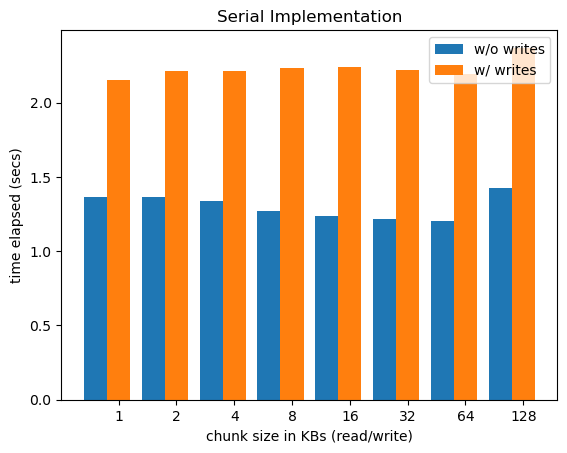

In [45]:
singleX = ["1", "2", "4", "8", "16", "32", "64", "128"]
width = 0.4
br1 = np.arange(len(singleX))
br2 = [x + width for x in br1] 
plt.bar(br1, avgSingle, width = width, label='w/o writes')
plt.bar(br2, avgSingleWrites, width = width, label='w/ writes')

plt.xlabel("chunk size in KBs (read/write)")
plt.ylabel("time elapsed (secs)")
plt.xticks([r + width for r in range(len(singleX))], singleX)
plt.title("Serial Implementation")
plt.legend()
plt.show()

## Multi-threaded Implementation

In [41]:
avgThreads = []
for t in range(0, 7):
    avg = 0.0
    for _ in range(times):
        p = subprocess.Popen("./cha -d -i 1GB.bin -t {}".format(2**t), stdout=subprocess.PIPE, shell=True)
        (output, err) = p.communicate()
        p_status = p.wait()
        elapsed = float(str(output.decode()))
        avg += elapsed
    avg = avg/times
    avgThreads.append(avg)
    
avgThreadsWrites = []
for t in range(0, 7):
    avg = 0.0
    for _ in range(times):
        p = subprocess.Popen("./cha -d -i 1GB.bin -o out.bin -t {}".format(2**t), stdout=subprocess.PIPE, shell=True)
        (output, err) = p.communicate()
        p_status = p.wait()
        elapsed = float(str(output.decode()))
        avg += elapsed
    avg = avg/times
    avgThreadsWrites.append(avg)

Graph:

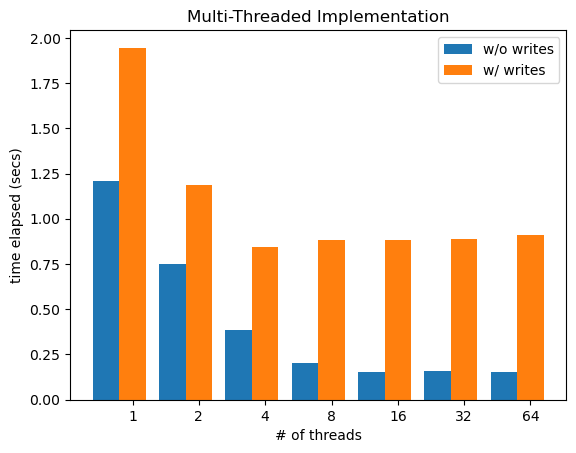

In [46]:
threads = ["1", "2", "4", "8", "16", "32", "64"]
width = 0.4
br1 = np.arange(len(threads))
br2 = [x + width for x in br1] 
plt.bar(br1, avgThreads, width = width, label='w/o writes')
plt.bar(br2, avgThreadsWrites, width = width, label='w/ writes')

plt.xlabel("# of threads")
plt.ylabel("time elapsed (secs)")
plt.xticks([r + width for r in range(len(threads))], threads)
plt.title("Multi-Threaded Implementation")
plt.legend()
plt.show()

## GPU Implementation

In [52]:
avgGPU = []
for g in range(0, 9):
    avg = 0.0
    for _ in range(times):
        p = subprocess.Popen("./cha -d -i 1GB.bin -g {}".format(1*(2**g)), stdout=subprocess.PIPE, shell=True)
        (output, err) = p.communicate()
        p_status = p.wait()
        elapsed = float(str(output.decode()))
        avg += elapsed
    avg = avg/times
    avgGPU.append(avg)
    
avgGPUWrites = []
for g in range(0, 9):
    avg = 0.0
    for _ in range(times):
        p = subprocess.Popen("./cha -d -i 1GB.bin -o out.bin -g {}".format(1*(2**g)), stdout=subprocess.PIPE, shell=True)
        (output, err) = p.communicate()
        p_status = p.wait()
        elapsed = float(str(output.decode()))
        avg += elapsed
    avg = avg/(times)
    avgGPUWrites.append(avg)

Graph:

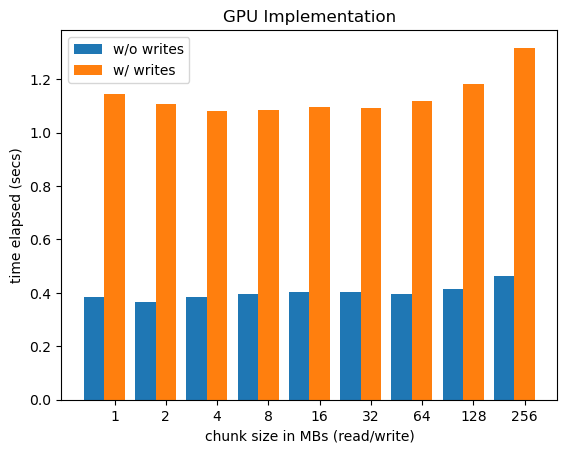

In [58]:
gpuChunk = ["1", "2", "4", "8", "16", "32", "64", "128", "256"]
width = 0.4
br1 = np.arange(len(gpuChunk))
br2 = [x + width for x in br1] 
plt.bar(br1, avgGPU, width = width, label='w/o writes')
plt.bar(br2, avgGPUWrites, width = width, label='w/ writes')

plt.xlabel("chunk size in MBs (read/write)")
plt.ylabel("time elapsed (secs)")
plt.xticks([r + width for r in range(len(gpuChunk))], gpuChunk)
plt.title("GPU Implementation")
plt.legend()
plt.show()

Combined:

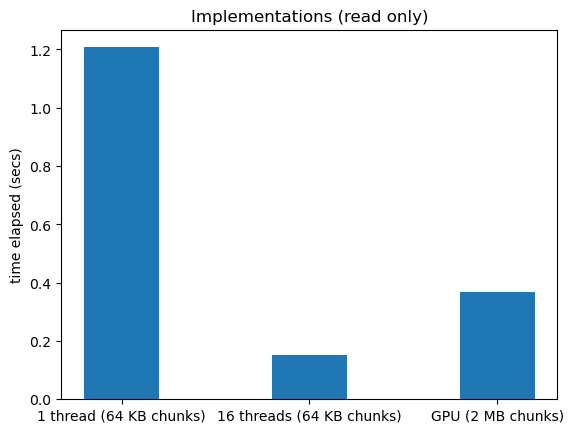

In [65]:
minThreads = avgThreads.index(min(avgThreads))
minGPU = avgGPU.index(min(avgGPU))

labels = ["1 thread (64 KB chunks)", threads[minThreads]+" threads (64 KB chunks)", "GPU ("+gpuChunk[minGPU]+" MB chunks)"]
toPlot = [avgThreads[0], avgThreads[minThreads], avgGPU[minGPU]]
width = 0.4
plt.bar(labels, toPlot, width = width)

plt.ylabel("time elapsed (secs)")
plt.title("Implementations (read only)")
plt.show()